In [ ]:
!unzip PuneR.zip -d ./

Archive:  PuneR.zip
a5daf2828fb9645676438eec4f886726ffa63f83
   creating: ./pune-house-price-prediction-main/
 extracting: ./pune-house-price-prediction-main/Procfile  
  inflating: ./pune-house-price-prediction-main/README.md  
  inflating: ./pune-house-price-prediction-main/RidgeModel.pkl  
  inflating: ./pune-house-price-prediction-main/cleaned_data.csv  
  inflating: ./pune-house-price-prediction-main/data.csv  
  inflating: ./pune-house-price-prediction-main/main.py  
  inflating: ./pune-house-price-prediction-main/pune-house-price-prediction.ipynb  
  inflating: ./pune-house-price-prediction-main/requirements.txt  
   creating: ./pune-house-price-prediction-main/templates/
  inflating: ./pune-house-price-prediction-main/templates/index.html  


In [ ]:
!mv pune-house-price-prediction-main/* ./ && rm -rf pune-house-price-prediction-main

mv: cannot stat 'pune-house-price-prediction-main/*': No such file or directory


<ipython-input-16-614def6dbccf>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-16-614def6dbccf>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Mean Absolute Error: 3428.3085078210624
Mean Squared Error: 36160043.764038965


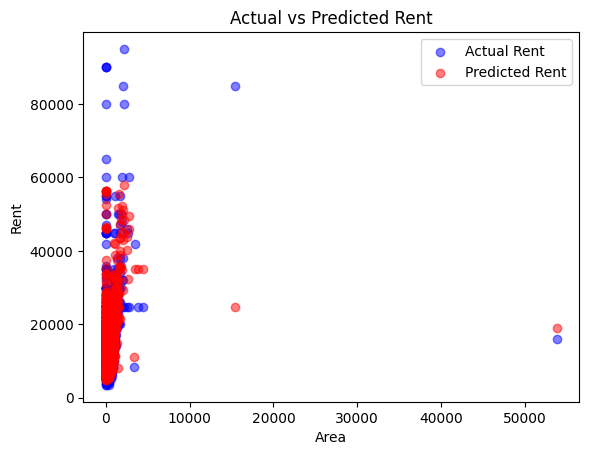

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset from Excel
df = pd.read_csv('PuneR.xls')  # Replace with your actual file name

# Handle missing values
# Iterate through columns and fill NaNs with the mean only for numeric columns
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].mean(), inplace=True)
    # Handle missing values in string/object columns, e.g., with the most frequent value
    # This part depends on how you want to handle missing values in categorical columns
    # For now, we fill with 'missing'
    elif pd.api.types.is_string_dtype(df[column]):
        df[column].fillna("missing", inplace=True)

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['furnishing', 'avalable_for', 'address', 'parking'], drop_first=True)

# Select features and target variable
X = df[['bedroom', 'bathrooms', 'area', 'floor_number', 'deposit_amt']]
y = df['rent']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust k

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Rent', alpha=0.5)
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Rent', alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Actual vs Predicted Rent')
plt.legend()
plt.show()




In [ ]:
# Predict rent based on user input for area
input_area = float(input("Enter the area for rent prediction: "))

# For prediction, you may need to provide values for other features as well
# Here we'll just assume some example values for the other features
example_features = {
    'bedroom': 2,  # Change as needed
    'bathrooms': 1,  # Change as needed
    'floor_number': 1,  # Change as needed
    'deposit_amt': 50000  # Change as needed
}

# Create a DataFrame for the input
input_data = pd.DataFrame({
    'bedroom': [example_features['bedroom']],
    'bathrooms': [example_features['bathrooms']],
    'area': [input_area],
    'floor_number': [example_features['floor_number']],
    'deposit_amt': [example_features['deposit_amt']]
})

# Predict rent using the KNN model
predicted_rent = knn.predict(input_data)
print(f'The predicted rent for an area of {input_area} is: {predicted_rent[0]}')

Enter the area for rent prediction: 750
The predicted rent for an area of 750.0 is: 16700.0


Training R² Score: 0.2188
Testing R² Score: 0.2042


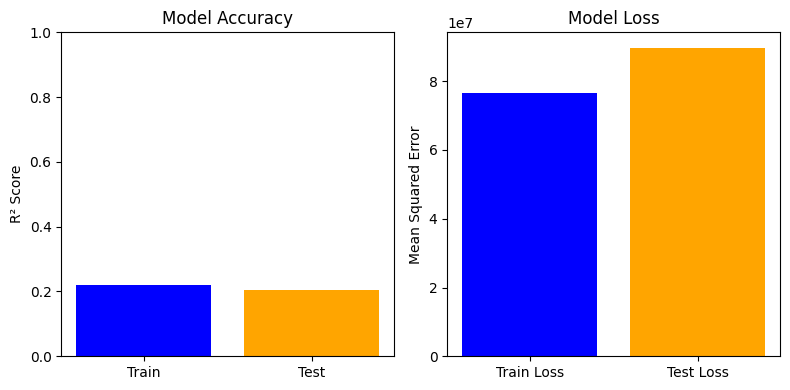

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Load the dataset from the CSV file
df = pd.read_csv('PuneR.xls')

# Define features and target
X = df.drop('rent', axis=1)
y = df['rent']

# Preprocess categorical features
categorical_features = [
    'furnishing', 'avalable_for', 'address', 'facing',
    'floor_type', 'gate_community', 'corner_pro', 'propertyage'
]
numeric_features = ['bedroom', 'bathrooms', 'area', 'floor_number',
                   'parking', 'aggDur', 'noticeDur', 'lightbill',
                   'powerbackup', 'no_room', 'pooja_room',
                   'study_room', 'others', 'servant_room',
                   'store_room', 'brok_amt',
                   'deposit_amt', 'mnt_amt']  # Removed 'maintenance_amt'

# Add 'maintenance_amt' to categorical features for one-hot encoding
categorical_features.append('maintenance_amt')


# Creating the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create the full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the model
# joblib.dump(model, 'house_price_model.pkl')

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print R² scores
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")

# Plot R² scores
plt.figure(figsize=(8, 4))

# R² Score Bar Plot
plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], [train_r2, test_r2], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('Model Accuracy')

# Loss (Mean Squared Error) Plot
train_loss = np.mean((y_train - y_train_pred) ** 2)
test_loss = np.mean((y_test - y_test_pred) ** 2)

plt.subplot(1, 2, 2)
plt.bar(['Train Loss', 'Test Loss'], [train_loss, test_loss], color=['blue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Model Loss')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import joblib

# Load the trained model
# model = joblib.load('house_price_model.pkl')  # Uncomment when you have a saved model

# Load the dataset
df = pd.read_csv('PuneR.xls')

def predict_rent(locality, bhk):
    # Prepare input data for the model
    input_data = pd.DataFrame({
        'bedroom': [bhk],
        'bathrooms': [2],  # You can modify this as needed
        'area': [sqftarea],       # Use sqftarea here
        'furnishing': ['Semifurnished'],  # Modify as needed
        'avalable_for': ['All'],         # Modify as needed
        'address': [f"{locality}, Pune, Maharashtra"],  # Construct address using locality
        'floor_number': [1],  # Placeholder, adjust as necessary
        'facing': ['No Direction'],  # Modify as needed
        'floor_type': ['Not provided'],  # Modify as needed
        'gate_community': ['No'],         # Modify as needed
        'corner_pro': ['No'],              # Modify as needed
        'parking': [1],                    # Placeholder, adjust as necessary
        'wheelchairadption': [None],      # Modify as needed
        'petfacility': [None],            # Modify as needed
        'aggDur': [0],                    # Modify as needed
        'noticeDur': [0],                 # Modify as needed
        'lightbill': [1],                 # Modify as needed
        'powerbackup': [0],               # Modify as needed
        'propertyage': ['1 to 5 Year Old'],  # Modify as needed
        'no_room': [1],                   # Modify as needed
        'pooja_room': [0],                # Modify as needed
        'study_room': [0],                # Modify as needed
        'others': [0],                    # Modify as needed
        'servant_room': [0],              # Modify as needed
        'store_room': [0],                # Modify as needed
        'maintenance_amt': [0],           # Modify as needed
        'brok_amt': [0],                  # Modify as needed
        'deposit_amt': [0],               # Modify as needed
        'mnt_amt': [0]                    # Modify as needed
    })

    for feature in categorical_features:
        input_data[feature] = input_data[feature].astype(str)

    # Preprocess the input data using the same preprocessor used during training
    input_data_processed = preprocessor.transform(input_data)

    # Make predictions
    predicted_rent = model.named_steps['regressor'].predict(input_data_processed)

    # Find matching entries in the dataset
    matching_entries = df[(df['address'].str.contains(locality, case=False)) &
                          (df['bedroom'] == bhk)
                          ]  # Assuming area is an exact match

    # Output results
    print(f"Predicted Rent for {bhk} BHK in {locality}: ₹{predicted_rent[0]:.2f}")
    print("\nMatching Entries:\n", matching_entries)

# Example usage
# Replace with actual user input
user_locality = input("Enter the locality name: ")  # Locality input
user_bhk = int(input("Enter the BHK: "))

predict_rent(user_locality, user_bhk)

Enter the locality name: baner
Enter the sqft area: 0
Enter the BHK: 2
Predicted Rent for 2 BHK in baner: ₹14512.57

Matching Entries:
       bedroom  bathrooms  area     furnishing avalable_for  \
0           2          2   0.0  Semifurnished          All   
340         2          2   0.0    Unfurnished  Family Only   
1384        2          2   0.0  Semifurnished  Family Only   
1559        2          2   0.0    Unfurnished          All   
2120        2          2   0.0  Semifurnished  Family Only   
3095        2          2   0.0      Furnished          All   
3631        2          2   0.0  Semifurnished          All   
4002        2          2   0.0  Semifurnished          All   
4417        2          1   0.0  Semifurnished  Family Only   
4803        2          2   0.0  Semifurnished          All   
4822        2          2   0.0  Semifurnished  Family Only   
4834        2          2   0.0  Semifurnished  Family Only   
5034        2          3   0.0    Unfurnished          All

Below is updated

In [ ]:
import pandas as pd
import joblib

# Load the trained model
# model = joblib.load('house_price_model.pkl')

# Load the dataset
df = pd.read_csv('PuneR.xls')
categorical_features = [
    'furnishing', 'avalable_for', 'address', 'facing',
    'floor_type', 'gate_community', 'corner_pro', 'propertyage'
]
numeric_features = ['bedroom', 'bathrooms', 'area', 'floor_number',
                   'parking', 'aggDur', 'noticeDur', 'lightbill',
                   'powerbackup', 'no_room', 'pooja_room',
                   'study_room', 'others', 'servant_room',
                   'store_room', 'brok_amt',
                   'deposit_amt', 'mnt_amt']  # Removed 'maintenance_amt'

# Add 'maintenance_amt' to categorical features for one-hot encoding
categorical_features.append('maintenance_amt')

def predict_rent(locality, bhk):
    # Prepare input data for the model
    input_data = pd.DataFrame({
        'bedroom': [bhk],
        'bathrooms': [2],  # You can modify this as needed
        'area': [0],       # Placeholder, adjust as necessary
        'furnishing': ['Semifurnished'],  # Modify as needed
        'avalable_for': ['All'],         # Modify as needed
        'address': [f"{locality}, Pune, Maharashtra"],  # Construct address using locality
        'floor_number': [1],  # Placeholder, adjust as necessary
        'facing': ['No Direction'],  # Modify as needed
        'floor_type': ['Not provided'],  # Modify as needed
        'gate_community': ['No'],         # Modify as needed
        'corner_pro': ['No'],              # Modify as needed
        'parking': [1],                    # Placeholder, adjust as necessary
        'wheelchairadption': [0],      # Modify as needed
        'petfacility': [0],            # Modify as needed
        'aggDur': [0],                    # Modify as needed
        'noticeDur': [0],                 # Modify as needed
        'lightbill': [1],                 # Modify as needed
        'powerbackup': [0],               # Modify as needed
        'propertyage': ['1 to 5 Year Old'],  # Modify as needed
        'no_room': [1],                   # Modify as needed
        'pooja_room': [0],                # Modify as needed
        'study_room': [0],                # Modify as needed
        'others': [0],                    # Modify as needed
        'servant_room': [0],              # Modify as needed
        'store_room': [0],                # Modify as needed
        'maintenance_amt': [0],           # Modify as needed
        'brok_amt': [0],                  # Modify as needed
        'deposit_amt': [0],               # Modify as needed
        'mnt_amt': [0]                    # Modify as needed
    })
    for feature in categorical_features:
        input_data[feature] = input_data[feature].astype(str)

    # Make predictions
    predicted_rent = model.predict(input_data)

    # Find matching entries in the dataset
    matching_entries = df[(df['address'].str.contains(locality, case=False)) &
                          (df['bedroom'] == bhk)
                          ]  # Assuming area is an exact match

    # Output results
    print(f"Predicted Rent for {bhk} BHK in {locality}: ₹{predicted_rent[0]:.2f}")
    print("\nMatching Entries:\n", matching_entries)

# Example usage
# Replace with actual user input
user_locality = input("Enter locality: ")

user_bhk = int(input("Enter bhk: ")       )

predict_rent(user_locality, user_bhk)


Enter locality: katraj
Enter bhk: 1
Predicted Rent for 1 BHK in katraj: ₹14512.57

Matching Entries:
       bedroom  bathrooms   area     furnishing           avalable_for  \
563         1          1    0.0    Unfurnished                    All   
660         1          1  600.0    Unfurnished                    All   
1205        1          1    0.0    Unfurnished            Family Only   
1639        1          2  545.0    Unfurnished                    All   
2067        1          1    0.0    Unfurnished            Family Only   
2083        1          1    0.0  Semifurnished                    All   
2107        1          1  700.0    Unfurnished                    All   
2556        1          1  950.0    Unfurnished                    All   
3082        1          1    0.0    Unfurnished            Family Only   
3089        1          1    0.0    Unfurnished                    All   
3204        1          1    0.0      Furnished            Family Only   
3235        1         

In [ ]:
joblib.dump(model, "house_predict.pkl")

['house_predict.pkl']